In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm



In [2]:
#read csv data fromt he path, save it to labeled_images
#../means parent directory
labeled_images = pd.read_csv('./input/train.csv')

#save the pixels to images as a 5000x728 array
images = labeled_images.iloc[0:5000,1:]

#save the labels, which is at the first column of each sample, at 0 position
labels = labeled_images.iloc[0:5000,:1]

#use train_test_split to split the data into train aubsets and test subsets
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0.5, 1.0, '6')

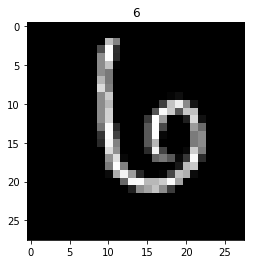

In [3]:
i=1
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])


(array([682.,   9.,  10.,   7.,  10.,  18.,   7.,  17.,   7.,  17.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

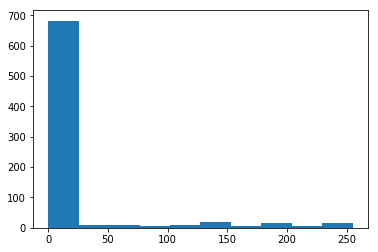

In [4]:
plt.hist(train_images.iloc[i])

In [5]:
clf = svm.SVC()
clf.fit(train_images, train_labels)
#clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This

Text(0.5, 1.0, '6')

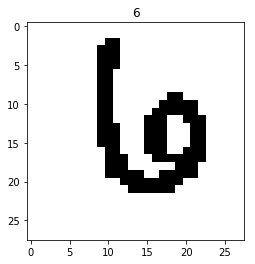

In [6]:
#make every nonzero pixel becomes 1, i.e. truning gray scale into black and white
test_images[test_images>0]=1
train_images[train_images>0]=1

#print out the black and white image
img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i,0])


(array([668.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

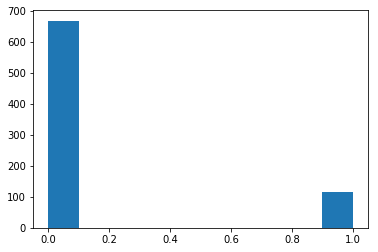

In [7]:
plt.hist(train_images.iloc[i])

In [8]:
#retrain the machine with the black and white image
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())

#show the score 
clf.score(test_images,test_labels)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.887